In [59]:
import pandas as pd
import numpy as np

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

In [60]:

loan_data = pd.read_csv("loan_train.csv")
loan_data['Loan_Status'].replace('N', 0,inplace=True)
loan_data['Loan_Status'].replace('Y', 1,inplace=True)
loan_data['Education'].replace('Graduate', 1,inplace=True)
loan_data['Education'].replace('Not Graduate', 0,inplace=True)
loan_data['Self_Employed'].replace('No', 0,inplace=True)
loan_data['Self_Employed'].replace('Yes', 1,inplace=True)
loan_data['Gender'].replace('Male', 0,inplace=True)
loan_data['Gender'].replace('Female', 1,inplace=True)
loan_data['Married'].replace('No', 0,inplace=True)
loan_data['Married'].replace('Yes', 1,inplace=True)
loan_data['Property_Area'].replace('Rural', 0,inplace=True)
loan_data['Property_Area'].replace('Urban', 1,inplace=True)
loan_data['Property_Area'].replace("Semiurban",2, inplace = True)
loan_data['Dependents'].replace("3+",3, inplace = True)
loan_data.dropna(inplace = True)


y =  loan_data["Loan_Status"]
X = loan_data.loc[:, loan_data.columns != 'Loan_Status']
X = X.loc[:, X.columns != 'Loan_ID']


In [62]:
train_score=[]
test_score =[]
test_size =[]
for i in range(10,100,1):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100, random_state=42)

    clf = MLPClassifier(random_state=1).fit(X_train, y_train)
    
    clf.predict(X_train)
    train_score.append(clf.score(X_train, y_train))
    
    clf.predict(X_test)
    test_score.append(clf.score(X_test, y_test))
    
    test_size.append(i/100)
    


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0, 0.5, 'train_score')

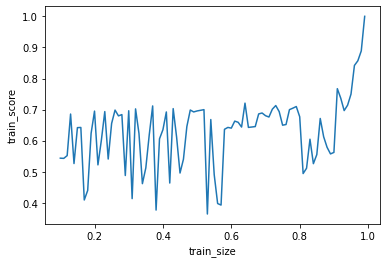

In [63]:
plt.plot(test_size,train_score)
plt.xlabel("train_size")
plt.ylabel("train_score")


Text(0, 0.5, 'test_score')

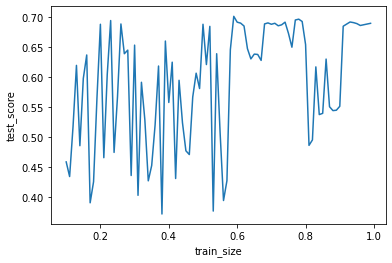

In [64]:
plt.plot(test_size,test_score)
plt.xlabel("train_size")
plt.ylabel("test_score")

In [7]:
X_test = X_test.astype(float)

In [8]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

0.6527777777777778

Hyper parameter tuning

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.60, random_state=42)
train_score=[]
test_score =[]
ephocs =[]
for i in range(1, 500,50):
    
    

    clf = MLPClassifier(random_state=1,max_iter=i).fit(X_train, y_train)
    
    clf.predict(X_train)
    train_score.append(clf.score(X_train, y_train))
    
    clf.predict(X_test)
    test_score.append(clf.score(X_test, y_test))
    
    ephocs.append(i)
    


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0, 0.5, 'test_score')

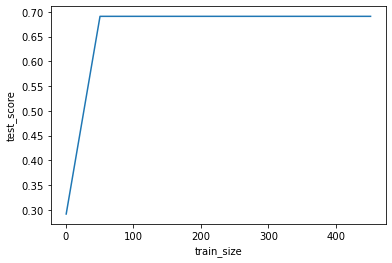

In [41]:
plt.plot(ephocs,test_score)
plt.xlabel("train_size")
plt.ylabel("test_score")

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.60, random_state=42)
train_score=[]
test_score =[]
ephocs =[]
for i in range(1, 500,10):
    
    

    clf = MLPClassifier(random_state=1,max_iter=100, hidden_layer_sizes = (i,)).fit(X_train, y_train)
    
    clf.predict(X_train)
    train_score.append(clf.score(X_train, y_train))
    
    clf.predict(X_test)
    test_score.append(clf.score(X_test, y_test))
    
    ephocs.append(i)
    


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

Text(0, 0.5, 'test_score')

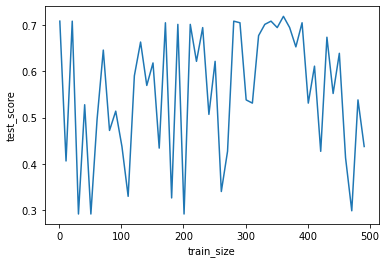

In [51]:
plt.plot(ephocs,test_score)
plt.xlabel("train_size")
plt.ylabel("test_score")

In [57]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.60, random_state=42)
clf = MLPClassifier(random_state=1,activation= 'tanh').fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

0.7013888888888888

In [56]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.60, random_state=42)
clf = MLPClassifier(random_state=1,activation= 'relu').fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

0.6909722222222222